In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


trong đề thầy bảo lấy Mammogram có kích thước 256x256, nhưng dataset thầy đưa là 'mammogram 512x512', ta làm theo dạng 512 để không lỗi!

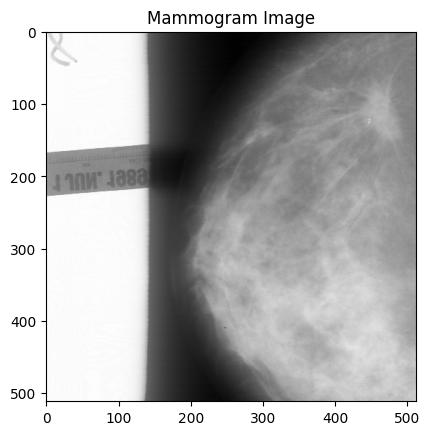

In [ ]:
#đọc ảnh mammogram 512x512
def read_bin_image(filename, shape=(512, 512)): 
    with open(filename, 'rb')    as f:
        img = np.frombuffer(f.read(), dtype=np.uint8)
    return img.reshape(shape)

mammogram = read_bin_image("mammogram.bin")

plt.imshow(mammogram, cmap='gray')
plt.title("Mammogram Image")
plt.show()

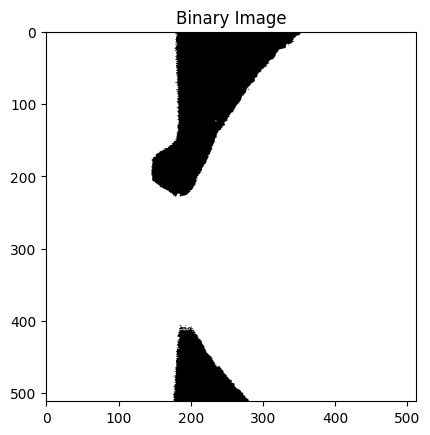

In [13]:
# Chuyển ảnh xám thành ảnh nhị phân bằng thresholding

threshold = 100  # Điều chỉnh ngưỡng nếu cần
binary_image = (mammogram > threshold).astype(np.uint8) * 255

plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.show()


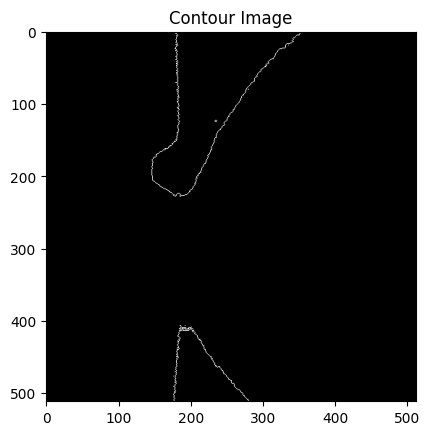

In [14]:
#thuật toán "Approximate Contour Image Generation"
edges = cv2.Laplacian(binary_image, cv2.CV_8U)

plt.imshow(edges, cmap='gray')
plt.title("Contour Image")
plt.show()


Could a chain code be used to represent the main contour in your contour image? Why or why not?

- Yes, a chain code could be used to represent the main contour in the contour image. Chain codes are useful for representing object boundaries by encoding the sequence of directions along the contour.

- By using cv2.findContours(), we can extract the boundary of the segmented object and then convert it into a chain code representation. This method is effective because:

+ Compact Representation: The contour is stored as a sequence of direction changes rather than raw pixel coordinates.
+ Rotation and Scale Invariance: Normalized chain codes can help make the representation independent of rotation and scaling.
+ Easy Reconstruction: The original contour shape can be reconstructed using the chain code.

- However, potential challenges include sensitivity to noise and variations in contour smoothness, which may require preprocessing such as contour simplification.
